In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as clrs

import sklearn.linear_model

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

## Dataset

Generating random generated data:

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=41, n_clusters_per_class=2)

X.shape, y.shape, X[:, 0].shape, X[:, 1].shape

((100, 2), (100,), (100,), (100,))

Displaying dataset

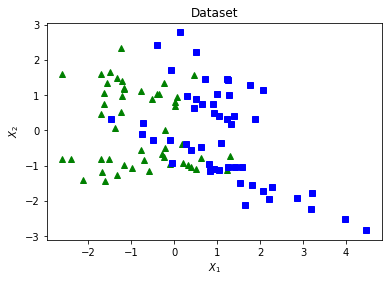

In [3]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")

plt.title('Dataset')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

 ## Train

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)

In [5]:
svc = SVC(gamma=0.5).fit(X_train, y_train)

## Display the precision recall curve

In [6]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

precision, recall, thresholds

(array([0.61111111, 0.58823529, 0.625     , 0.66666667, 0.71428571,
        0.76923077, 0.75      , 0.81818182, 0.8       , 0.77777778,
        0.75      , 0.85714286, 0.83333333, 0.8       , 0.75      ,
        0.66666667, 0.5       , 1.        , 1.        ]),
 array([1.        , 0.90909091, 0.90909091, 0.90909091, 0.90909091,
        0.90909091, 0.81818182, 0.81818182, 0.72727273, 0.63636364,
        0.54545455, 0.54545455, 0.45454545, 0.36363636, 0.27272727,
        0.18181818, 0.09090909, 0.09090909, 0.        ]),
 array([-0.9791845 , -0.90386743, -0.8941331 , -0.85154629, -0.80827384,
        -0.66585271, -0.34734058,  0.10556372,  0.14017212,  0.38445219,
         0.61400261,  0.83953687,  0.87939757,  0.96017829,  1.0301401 ,
         1.04626156,  1.10296753,  1.11981545]))

In [7]:
# Threshold 0 is the default value
close_zero = np.argmin(thresholds)
print(f"precision[{close_zero}]: {precision[close_zero]:.2}, recall[{close_zero}]: {recall[close_zero]}")

precision[0]: 0.61, recall[0]: 1.0


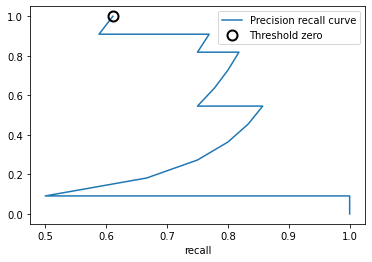

In [9]:
plt.plot(precision, recall, label="Precision recall curve")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label="Threshold zero", fillstyle="none", c='k', mew=2)

plt.xlabel('Precision')
plt.xlabel('recall')
plt.legend(loc="best")
plt.show()